# Stabilities and accuracy in time. 

Lets consider same setup as in [ex_3a](https://github.com/AST-Course/AST5110/blob/main/ex_3a.ipynb) Burgers’ equation, i.e.,

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0   \tag{1}$$ 

for the domain $x \in (x_0, x_f)$ with $x_0 = −1.4$, $x_f = 2.0$ with initial condition:

$$u(x,t=0) = A\left[\tanh\left(\frac{x+x_c}{W}\right)-\tanh\left(\frac{x-x_c}{W}\right)\right]   \tag{2}$$

whereby $A = 0.02$ , $x_c = 0.70$, $W = 0.1$. Let the solution evolve until time $t_f = 100$. Explain in physical (or mathematical) terms the solution you get. However, let's now implement a new time-step method. 

Add the following method to your library and run the previous simulation. 

$$u^{n+1}_j = \frac{1}{2}(u^n_{j+1} + u^n_{j-1}) - \frac{v \Delta t}{2 \Delta x}(u^n_{j+1} - u^n_{j-1})$$

Apply von Neumann stability analysis to the expression above. The stability condition $|\xi(k)|^2 \leq 1$ leads to the famous Courant-Friedrichs-Lewy (CFL) stability. 

Add this to your library and solve the previous simulation imposing the CFL condition. For this exercise, fill in `nm_lib` the function `evolv_Lax_uadv_burgers`. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from importlib import reload

from nm_lib import nm_lib as nm, utils as utils

plt.style.use("fast")

def get_uadv_t0(xx: np.ndarray, A: float = 0.02, W: float = 0.1, xc: float = 0.7) -> np.ndarray:
    tanh_term = np.tanh((xx + xc) / W) - np.tanh((xx - xc) / W)
    return A * tanh_term


In [2]:
if __name__ == "__main__":
    x0 = -1.4
    xf = 2.0
    nint = 256 * 2
    tf = 100

    xx, _ = utils.get_xx(nint, x0, xf)
    uut0 = get_uadv_t0(xx)
    tt, uunt = nm.evolv_Lax_uadv_burgers(xx, uut0, ddx=nm.deriv_cent, bnd_limits=[1, 1], end_time=tf, cfl_cut=0.98)
    print(tt[-1])

    anim = utils.animate_u(tt[::16], uunt[::16], xx, initial=uut0)
    display(HTML(anim))
    plt.close()


100.19783091724645
Animation with nint=512, nframes=37:


<span style="color:Orange">

### Comments

Here we see the solution as a "soft" step function evolving in time with it self as it's own advection speed, somewhat goofy described. This means that each point on the curve will move in positiv direction with speed equal the value of the function at that point (or the other way around if the function values are negativ). The motion of each point is best described by the characteristic curves discussed in `ex_2a_analytical`, where the x-value of each point evolves in time following $\frac{dx_p}{dt} = u(x,t)$. This means the points starting on either side of the step function, where $u(x,t)\sim 0$, will move slowly (or not at all). While the points starting within the step function, where $u(x,t) > 0$, will move fast, and gain on the points in front of them moving slower. This discrepancy in speed causes there to be a sharp edge at the boarder between points not moving and points moving fast, forming a discontinuity or shock wave traveling in the direction of motion.

<span style="color:Orange">

### Von Neumann analysis

Solution on form $u_j^n = \xi^n e^{ikj\Delta x}$, require $\left|\xi(k)\right|<1$ for stability. Apply von Neumann on Lax–Friedrichs method:

We have

\begin{align*}
u_j^{n+1}   &= \xi^{n+1}e^{ijk\Delta x}\\
u_j^{n}     &= \xi^n e^{ijk\Delta x}\\
u_{j+1}^{n} &= \xi^n e^{ijk\Delta x}e^{ik\Delta x}\\
u_{j-1}^{n} &= \xi^n e^{ijk\Delta x}e^{-ik\Delta x}\\
\end{align*}

so

\begin{align}
\xi^{n+1}e^{ijk\Delta x} &= \frac{1}{2}\left(\xi^n e^{ijk\Delta x}e^{ik\Delta x} +  \xi^n e^{ijk\Delta x}e^{-ik\Delta x}\right) - \frac{v\Delta t}{2 \Delta x} \left(\xi^n e^{ijk\Delta x}e^{ik\Delta x} -  \xi^n e^{ijk\Delta x}e^{-ik\Delta x}\right) \\
&= \frac{1}{2}\xi^n e^{ijk\Delta x} \left(e^{ik\Delta x} + e^{-ik\Delta x} \right) - \frac{v\Delta t}{2 \Delta x}\xi^n e^{ijk\Delta x} \left(e^{ik\Delta x} - e^{-ik\Delta x}\right)
\quad \quad \big| \cdot \xi^{-n}e^{-ijk\Delta x} \\
\xi &= \frac{1}{2} \left(e^{ik\Delta x} + e^{-ik\Delta x} \right) - \frac{v\Delta t}{2 \Delta x}\left(e^{ik\Delta x} - e^{-ik\Delta x}\right)
\end{align}

using that $\cos(x) = \frac{e^{ix}+e^{-ix}}{2}$ and $\sin(x) = \frac{e^{ix}-e^{-ix}}{i2}$, and requiring $\left|\xi(k)\right|<1$ for all $k$ we have

\begin{align}
\xi &= \cos(k\Delta x) - \frac{v\Delta t}{2 \Delta x} i \sin(k\Delta x) \\
\left|\xi\right| &= \sqrt{\cos^2(k\Delta x) + \left(-\frac{v\Delta t}{2 \Delta x} \sin(k\Delta x)\right)^2 } <1
\end{align}

Max instability may occur for $k\Delta x = m \frac{\pi}{2}$ for $m\in \mathbb{Z}$, then $\cos^2(m\frac{\pi}{2}) = 0$ and $\sin^2(m\frac{\pi}{2}) =1$ so we must have $\left|\frac{v\Delta t}{\Delta x}\right| <1$ for $\left|\xi(k)\right|<1$ for all $k$, or $$\Delta t < \left|\frac{\Delta x}{v}\right|.$$

<span style="color:green">JMS</span>.

<span style="color:blue">GREAT JOB! </span>.


## 1- Diffusive. 

Redo the exercise [ex_2b](https://github.com/AST-Course/AST5110/blob/main/ex_2b.ipynb) and compare the two methods, i.e., one from 
[ex_2b](https://github.com/AST-Course/AST5110/blob/main/ex_2b.ipynb) and the Lax-Method. 

Which one is more diffusive? Why? Rewrite Lax-method, so the right-hand side is as follows: 

$$\frac{u^{n+1}-u^{n}}{\Delta t} = ...$$

What is the reminder term look like? Is the order of convergence the same for the two methods? 

<span style="color:Orange">

## Comments

I'm not sure I understand correctly what to do in this task. I interpret it as I'm asked to compare the Lax method to one of the methods from ex_2b, and so I assume I'm supposed to look at the Burgers equation with constant advection speed, as that is what the methods from ex_2b is capable of. But now I give the advection speed as the initial condition of $u$ as an array. For this I also implemented the `nm_lib.evolv_Lax_adv_burgers` method. With this setup, the speed of the points on the sides of the initial step function will always be low, and so we should see a "wave" moving to the right while collapsing as it reach the the boundary between points moving with low speed and high speed. This is more or less what we observe from our numerical upwind approximation, but the Lax-method doesn't maintain the sharp edge of the discontinuity -- it develops magnitude on points to the right of the edge. This is caused by the Lax-method being more diffusive. I think this diffusivity is due to the Lax-method using the neighboring points $j+1$ and $j-1$ in order to estimate both the temporal and spacial derivative at $j$, while the Upwind-method uses the current and previous point for the spacial derivative and only the current point for the time derivative. As such, for the Lax-method, a point laying just to the right of the edge (say at j=edge+1) will be updated in time using the mean of the next (j=edge+2) and the previous value (j=edge) -- where the previous is on the edge and thus has a much higher value.

Below I create an animation of the evolution of each solution using my `utils.animate_us` method, as well as plotting some snapshots of each solution at specified times, demonstrating this diffusive behavior.

<span style="color:green">JMS</span>.

<span style="color:red">Actually it is much easier that what you are trying to do. I'm not asking to consider the burger eq with constant velocity, but with velocity=u for the upwind (something that you already did in ex 3!). So, except for the eqs. I think you already did most of this in ex 3.  </span>.


Animation with nint=512, nframes=62:


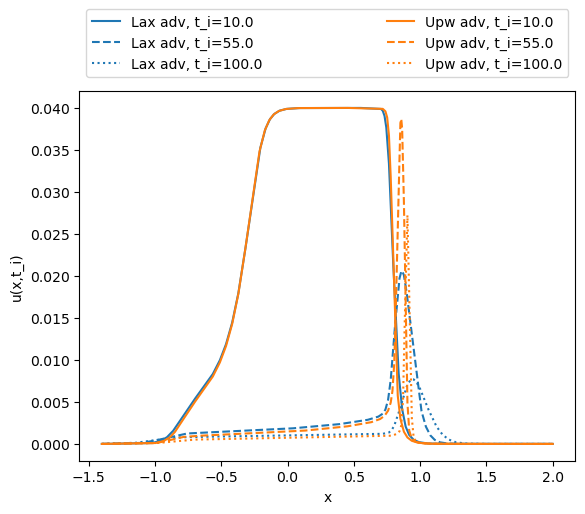

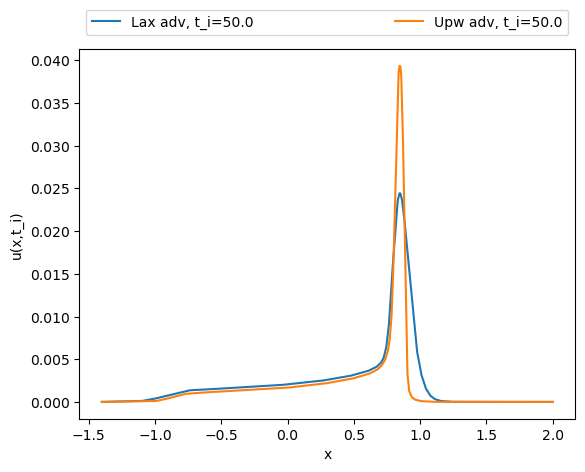

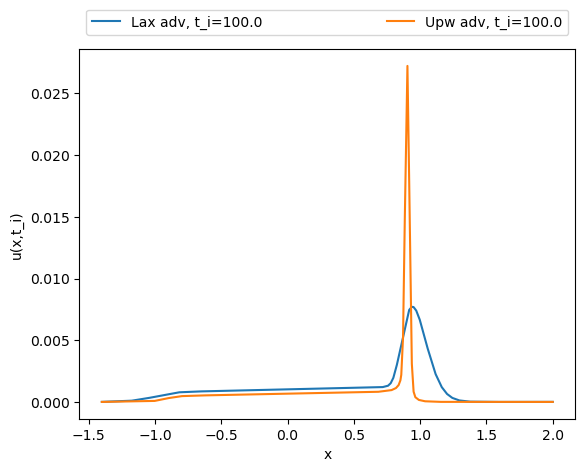

In [3]:
if __name__ == "__main__":
    x0 = -1.4
    xf = 2.0
    nint = 256 * 2
    tf = 100

    xx, _ = utils.get_xx(nint, x0, xf)
    uut0 = get_uadv_t0(xx)

    tt_Lax, uunt_Lax = nm.evolv_Lax_adv_burgers(
        xx, uut0, a=uut0, ddx=lambda x, u: nm.deriv_cent(x, u), bnd_limits=[1, 1], end_time=tf
    )
    tt_upw, uunt_upw = nm.evolv_adv_burgers(
        xx, uut0, a=uut0, ddx=lambda x, u: nm.deriv_upw(x, u), bnd_limits=[1, 0], end_time=tf
    )
    sol_dict = {
        "Lax adv": (tt_Lax, uunt_Lax),
        "Upw adv": (tt_upw, uunt_upw),
    }

    utils.plot_snapshot(sol_dict, xx, time_stamps=np.linspace(tf * 0.1, tf, 3))
    utils.plot_snapshot(sol_dict, xx, time_stamps=[tf / 2])
    utils.plot_snapshot(sol_dict, xx, time_stamps=[tf])
    display(HTML(utils.animate_us(sol_dict, tt_Lax[::10], xx, initial=uut0)))
    plt.close()


<span style="color:Orange">

## Solution

I start by introducing the term $-u^n_j$ on both sides of the equation for the Lax-method, and divide by $\Delta t$ to get the first order approximation of the time derivative

\begin{align}
u^{n+1}_j &= \frac{1}{2}\left(u^n_{j+1} + u^n_{j-1}\right) - \frac{v \Delta t}{2 \Delta x}\left(u^n_{j+1} - u^n_{j-1}\right) \quad \big| \cdot \frac{-u_j^n}{\Delta t} \\

\frac{\partial u}{\partial t} \approx \frac{u_j^{n+1}-u_j^n}{\Delta t} &=
\frac{1}{2\Delta t}\left(u^n_{j+1} + u^n_{j-1}\right) - \frac{v}{2 \Delta x}\left(u^n_{j+1} - u^n_{j-1}\right) - \frac{u_j^n}{\Delta t}\\

&= \frac{1}{2\Delta t} \left(u_{j+1}^n -2u_j^n + u_{j-1}^n\right)  - \frac{v}{2 \Delta x}\left(u^n_{j+1} - u^n_{j-1}\right)
\end{align}

Recognizing the double second order central derivative in the first term I introduce $\Delta x^2$, and the first second order central derivative in the second term, I find
\begin{align}
\frac{\partial u}{\partial t} \approx \frac{u_j^{n+1}-u_j^n}{\Delta t} &=
\frac{\Delta x^2}{2\Delta t} \frac{u_{j+1}^n -2u_j^n + u_{j-1}^n}{\Delta x^2}  - v\frac{u^n_{j+1} - u^n_{j-1}}{2\Delta x} \\
&= - v \frac{\partial u}{\partial x} + \frac{\Delta x^2}{2\Delta t} \frac{\partial^2 u}{\partial x^2} \\
&= - u \frac{\partial u}{\partial x} + \frac{\Delta x^2}{2\Delta t} \frac{\partial^2 u}{\partial x^2} \quad \text{using $v=u$}\\
\end{align}

So by using the Lax-method we have as "left over" from the approximation an additional term of $ \frac{\Delta x^2}{2\Delta t} \frac{\partial^2 u}{\partial x^2}$ which is not there in the advective Burgers equation we are considering. This term takes form as a diffusive term with coefficient, D, such that $\frac{\partial D\partial u}{\partial x^2} =  \frac{\Delta x^2}{2\Delta t} \frac{\partial^2 u}{\partial x^2}$. It is therefor not suprising that we see the Lax-method being more diffusive than the Upwind method where such a term is not present.

If I understand the order of convergence correctly by inspecting this expression, I see that for the Lax-method the Taylor series for the time derivative has a "left over" term which equals this diffusive term, which goes like $\frac{\Delta x^2}{\Delta t}$. This looks like a second order convergence in space, however we know the time step is in turn dependent on $\Delta x$, so I conclude with this being a first order convergence.


<span style="color:green">JMS</span>.

<span style="color:blue">GREAT JOB! In fact, I just realized that you did the eqs here... so, if it is clear what I was asking, then I think you are done with this ex too</span>.




---

(\*) Equation (1) is, in fact, a shortened version of the full Burgers’ equation, which contains a viscosity term on the right-hand side, as follows:
$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}.$$